The goal of this module is to provide a brief introduction to neural networks and to demystify machine learning, a concept which is often discussed in terms of "buzzwords" but which is in fact often a useful and relevant research tool.

There are two main packages broadly used to construct neural networks in Python: Pytorch and Tensorflow. We will be using the Keras module of Tensorflow today. We will use Keras to construct a simple neural network that performs linear regressions and to use that simple network as an example with which to explain some of the key concepts and principles of using neural networks.

Scikit-Learn is another package with extremely useful machine learning functions besides neural networks (ex. principal component analysis (PCA), random forest, etc.) We encourage you to explore Scikit-Learn as well.


First, let's import the packages that we'll need. Fortunately, Google CoLab has all of these built-in, which is why we're using it.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

First, let's import some data. This will give us something for us to train and test our neural network on--a task for it to learn!

We're using a housing dataset that Google (the creator of Tensorflow) uses for many of its tutorials. We'll make good use of what you learned about Pandas from the Python module to read in and explore the data.

In [ ]:
#@title Import the Data

# Import the data using Pandas (you could use Numpy for this, but I prefer Pandas for readiing in data & cleaning it up)
training_df = pd.read_csv(filepath_or_buffer="https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Put the median house value in units of thousands of dollars
# This will just make the numbers easier to work with / interpret
training_df["median_house_value"] /= 1000.0

# Print the beginning of the DataFrame, just to take a look
training_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66.9
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80.1
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85.7
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73.4
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65.5


Before we actually make and run our neural network, we need to do something very important: take a look at our training data! If there is something funky with the training data, the neural network will learn that same weirdness rather than the actual information we want to make good predictions. In essence: **give the network bad data to learn, and it will give you bad predictions**.

If any of the columns look like they have questionable data, then we probably don't want to use them as features with which to train our network. A **feature** is an input variable with which a network makes a prediction, and an **example** contains one or more features. For instance, if we want a network to predict college GPAs, we might give the network high school GPAs and SAT scores. These are our features, and one example would contain both an SAT score and a high school GPA.

Which columns should we not use as featues for our house value prediction network?

In [ ]:
training_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207.300912
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115.983764
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119.400000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180.400000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000


**How does a neural network work?**

Now we have our data ready and can build our model! It's always good to understand what your code actually does, though, so now would be a good time to cover the basics of how neural networks function to make them a bit less of a mystery. We'll define some relevant terms here, but Tensorflow also has a much more comprehensive glossary of common ML terms [here](https://developers.google.com/machine-learning/glossary/).

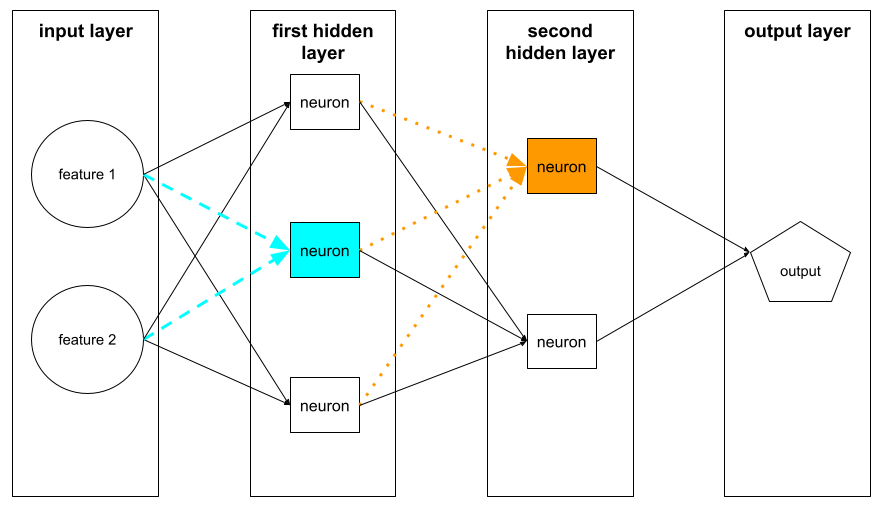
[Source](https://developers.google.com/machine-learning/glossary/)

There are three types of layers in a neural network: the **input layer** (where you input the data), **hidden layers** (layers between the input and output layers--called "hidden" because we don't directly see their inputs and outputs), and the **output layer** (from which we get the network's preidctions). Each hidden layer typically has multiple **neurons** or **nodes** are units within the hidden layers of a network.

What actually happens in these "hidden" layers? Data from the previous layer (either the input layer or a previous hidden layer) passes its outputs on to the next layer; these outputs are now the inputs for our current layer. Each neuron in the layer multiples the input data by its **weights** and adds a **bias** and passes that result to an activation function. The weights and biases are what the neural network actually "learns" or fits to the training data. An **activation function** into which the inputs multiplied by the weights are fed to calculate an output. The output of the activation function determines whether the neuron will be activated and pass its output on to the next layer. Generally, we want these functions to be non-linear so that the network can learn non-linear relationships in the data (ex. f(x)=x would generally not be a great activation function!) Two of the most common activation functions are the Rectified Linear Unit (ReLU) and the sigmoid activation function, respectively shown below.

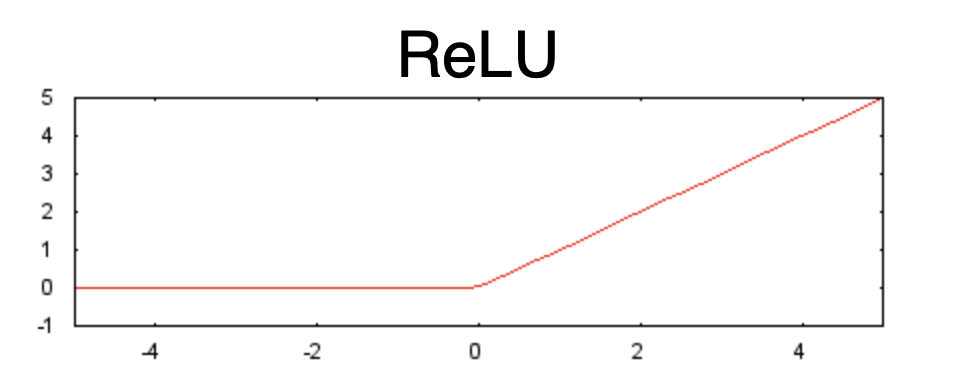

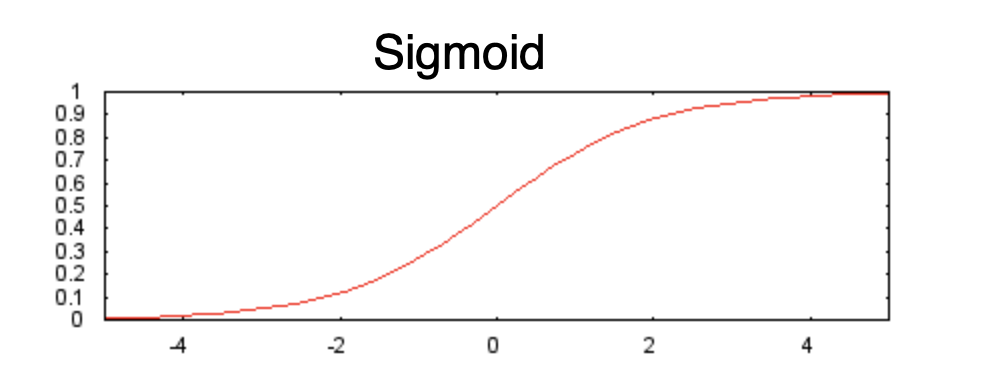

We can also make different types of hidden layers. Here are a couple that you're likely to see:
*   **dense layer**: a hidden layer in which nodes are connected to all of the nodes in the next layer
*   **convolutional layer**: a hidden layer in which nodes perform a convolution on the input data (a matrix). Any network with a convolutional layer is a convolutional neural network (CNN).

Keep in mind that there are now *many* types of neural networks out there, and this is just a basic introduction!




In [ ]:
#@title Define the functions that build the model


"""
Why do we want functions for building the model and plotting the results?
Remember from our good coding practices section that any time you use a segment
of code more than once, it should be a function. Here, we might want to change
what feature we use to make our predictions and some of the model hyper-
parameters, so we'll make these sections into functions so we can change those
values easily and make the model again and again.
"""

def build_linreg_network(my_learning_rate):
  """Create and compile a linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # The architechture of a simple linear regression model is a
  # single node in a single layer.
  # Why? A simple linear regression has the form y = m*x + b
  # This is the equation for what would happen in a single node: x is the input,
  # m is the weight by which the network multiplies the input,
  # b is the bias, and y is the output.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,))) # we are just inputting one number here!

  # Compile the model. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.experimental.RMSprop(learning_rate=my_learning_rate),
                loss="mean_squared_error", # this is the loss function for linear regression
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
  
  # What is a loss function? See the markdown cell below!

  return model        


Note that if we wanted to build a larger, more complex network, we would just keep adding layers (and probably layers with more than one node, too!)
ex. We would continue to do:

model.add(tf.keras.layers.Dense(units=n_nodes), activation=activation_function)

Note that to justify a more complex model, we would probably want to use more than one feature to make predictions, so the input_shape of that first layer would also have to change. The default activation for a Dense layer is linear; if we're not doing a linear regression model, then we might want to specify a nonlinear activation function!

Next we're going to train the neural network. This is where the network "learns" the weights that minimize the loss function we have defined. Here are some terms that you might see come up:

*   **loss**: a measure of the difference between model predictions and the true values determined by a loss function; often used during model training and validation to dtermine the strength of the model predictions
*   **loss function**: a function that gives some quantitative measure of the difference between the predicted and true values, generally calculated in batches. Our goal is typically to minimize the loss of our model (thus indicating better model predictions). We usually choose to use different loss functions for different scenarios (ex. Root Mean Square might be a good loss function for a linear regression, but not for binary categorization problem!)
*  **batch size**: how many samples you give the network in each training iteration (ex. you give the network the data in chunks or "batches" of N samples at a time), batch size can effect training time and model quality
*   **epoch**: a full training iteration for the network, i.e. in one epoch, the network goes through the full set of training data once
*   **learning rate**: a user set hypterparameter that determines how much the model weights can change in each iteration over the training data - if this number is too low, training will be very slow, but if it is too high, the loss might not level out to a constant value (or converge) during training



In [ ]:
#@title Define the function to train the model

def train_model(model, df, feature, label, epochs, batch_size, validation_split):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=batch_size,
                      epochs=epochs,
                      validation_split=validation_split)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse_train = hist["root_mean_squared_error"]
  rmse_val = hist["val_root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse_train, rmse_val

# Let's also define some functions that will allow us to plot our results.

def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias # y-intercept
  x1 = random_examples[feature].max()
  y1 = trained_bias + (trained_weight * x1) # x1 = y0 + weight * x1
  plt.plot([x0, x1], [y0, y1], c='r')

  # Show the scatter plot and the red line.
  plt.show()


"""
Plotting the loss curve is an essential step of making + training any NN. When
looking at the loss curve, we are generally hoping to see the loss decrease as
we reach later training epochs and eventually level off to a roughly constant
value--this is what we call loss convergence.
"""

def plot_the_loss_curve(epochs, rmse_test, rmse_val):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], rmse_test[1:], label="Training Loss")
  plt.plot(epochs[1:], rmse_val[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  #merged_mae_lists = rmse_test[1:] + rmse_val[1:]
  highest_loss = max(max(rmse_test[1:]),max(rmse_val[1:]))
  lowest_loss = min(min(rmse_test[1:]),min(rmse_val[1:]))
  delta = highest_loss - lowest_loss

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  


Epoch 1/30
397/397 [==============================] - 1s 3ms/step - loss: 243249.9062 - root_mean_squared_error: 493.2037 - val_loss: 31717.5020 - val_root_mean_squared_error: 178.0941
Epoch 2/30
397/397 [==============================] - 1s 2ms/step - loss: 26823.8633 - root_mean_squared_error: 163.7799 - val_loss: 29316.0156 - val_root_mean_squared_error: 171.2192
Epoch 3/30
397/397 [==============================] - 1s 3ms/step - loss: 26196.6875 - root_mean_squared_error: 161.8539 - val_loss: 29160.9922 - val_root_mean_squared_error: 170.7659
Epoch 4/30
397/397 [==============================] - 1s 3ms/step - loss: 25741.7891 - root_mean_squared_error: 160.4425 - val_loss: 28580.6621 - val_root_mean_squared_error: 169.0582
Epoch 5/30
397/397 [==============================] - 1s 2ms/step - loss: 25305.1328 - root_mean_squared_error: 159.0759 - val_loss: 27951.4043 - val_root_mean_squared_error: 167.1867
Epoch 6/30
397/397 [==============================] - 1s 2ms/step - loss: 24606

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


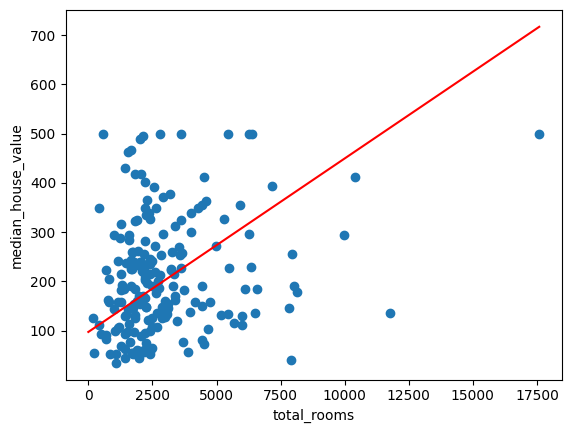

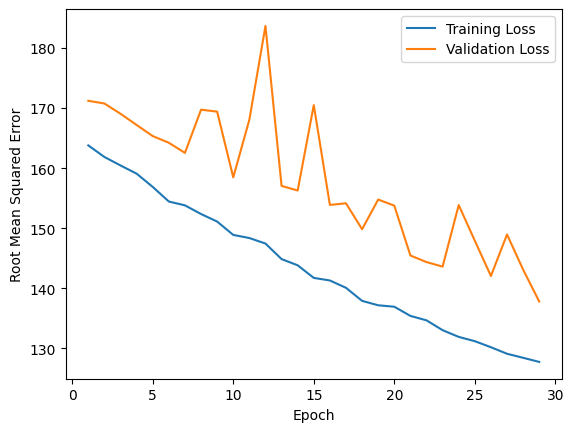

In [ ]:
#@title And now we can actually run those functions!

# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30 # we can increase the number of training epochs if necessary to get the loss to converge
batch_size = 30 # this is a roughly reasonable batch size
# I tend to use batch sizes generally between 10 and 100.

# Split the original training set into a reduced training set and a
# validation set - this will give us feedback on whether the model is
# actually learning
validation_split = 0.2

# Specify the feature and the label.
my_feature = "total_rooms"  # the total number of rooms on a specific city block.
my_label= "median_house_value" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_linreg_network(learning_rate)
weight, bias, epochs, rmse_train, rmse_val = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size, 
                                         validation_split)

# What's up with these weird "%.4f"s?
# These are just nice format specifiers that will ensure that our
# weight and bias floats (decimals) only print to 4 decimal places;
# otherwise, we'd get a huge, long number printed out!
print("\nThe learned weight (slope) for your model is %.4f" % weight)
print("The learned bias (y-intercept) for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse_train, rmse_val)

The network has calculated both a slope and intercept for our linear model, great! However, do you notice something odd about our RMS error and loss function values between the test and validation sets? Generally, we need these two datasets to have **similar values** to confirm our model hasn't learned an incorrect relationship or that we've made assumptions about our data.

 Another reason we split data between test and validation datasets is to ensure our model hasn't **overfit** the data. **Overfitting** occurs when a machine learning network learns only what is given to it - give the model new data, and it will only predict the input dataset again! A large chunk of machine learning is ensuring our input data and model structure don't lead to overfitting and our model can react dynamically to new data.

 The model above isn't overfitting, but something isn't quite right. Let's see if we can get our test and validation data to better agree by first *shuffling* the data before making our test and training validation datasets.

In [ ]:
 shuffled_training_df = training_df.reindex(np.random.permutation(training_df.index))

Now we know that the two datasets have a representative mix of data, meaning we will train on *the entire spectrum* of input features rather than one specific range that may bias our future predictions. 

Let's think about what a good predictor of housing prices may be – total_rooms got us an okay result, but our loss values were still relatively high. If we want to get quantitative (or lazy), we can compute the correlation matrix on our dataframe to see which variables may be good predictors:

In [ ]:
# Have Pandas generate a correlation matrix.
training_df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925208,-0.114250,0.047010,0.071802,0.101674,0.059628,-0.015485,-0.044982
latitude,-0.925208,1.000000,0.016454,-0.038773,-0.069373,-0.111261,-0.074902,-0.080303,-0.144917
housing_median_age,-0.114250,0.016454,1.000000,-0.360984,-0.320434,-0.295890,-0.302754,-0.115932,0.106758
total_rooms,0.047010,-0.038773,-0.360984,1.000000,0.928403,0.860170,0.919018,0.195383,0.130991
total_bedrooms,0.071802,-0.069373,-0.320434,0.928403,1.000000,0.881169,0.980920,-0.013495,0.045783
population,0.101674,-0.111261,-0.295890,0.860170,0.881169,1.000000,0.909247,-0.000638,-0.027850
households,0.059628,-0.074902,-0.302754,0.919018,0.980920,0.909247,1.000000,0.007644,0.061031
median_income,-0.015485,-0.080303,-0.115932,0.195383,-0.013495,-0.000638,0.007644,1.000000,0.691871
median_house_value,-0.044982,-0.144917,0.106758,0.130991,0.045783,-0.027850,0.061031,0.691871,1.000000


With this insight into the dataset, we can start to see some variables that may be better predictors of a house's value. However, we're not just limited to what's in our dataset - we can combine any of these variables to make a new feature. Let's try some sort of density measure, since (generally) we know the more rooms a single person gets in the house the more expensive it is. Think about having your own bedroom at home vs. sharing a college dorm!

Epoch 1/30
454/454 [==============================] - 1s 2ms/step - loss: 49023.9727 - root_mean_squared_error: 221.4136 - val_loss: 70659.9609 - val_root_mean_squared_error: 265.8194
Epoch 2/30
454/454 [==============================] - 1s 2ms/step - loss: 43947.0781 - root_mean_squared_error: 209.6356 - val_loss: 64130.6641 - val_root_mean_squared_error: 253.2403
Epoch 3/30
454/454 [==============================] - 1s 2ms/step - loss: 39315.2148 - root_mean_squared_error: 198.2806 - val_loss: 58070.8359 - val_root_mean_squared_error: 240.9789
Epoch 4/30
454/454 [==============================] - 1s 2ms/step - loss: 35121.5938 - root_mean_squared_error: 187.4076 - val_loss: 52480.5469 - val_root_mean_squared_error: 229.0863
Epoch 5/30
454/454 [==============================] - 1s 2ms/step - loss: 31375.5938 - root_mean_squared_error: 177.1316 - val_loss: 47377.5625 - val_root_mean_squared_error: 217.6639
Epoch 6/30
454/454 [==============================] - 1s 2ms/step - loss: 28147.

/usr/local/lib/python3.10/dist-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


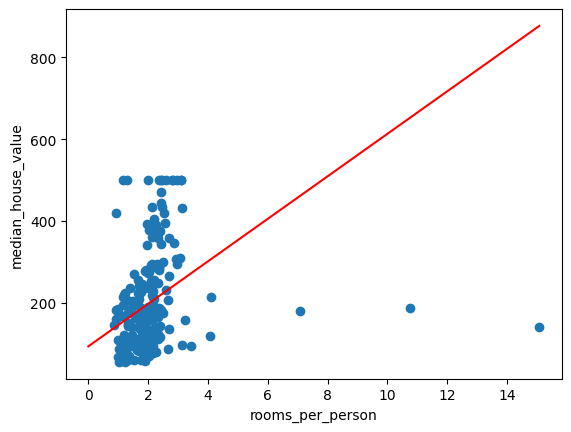

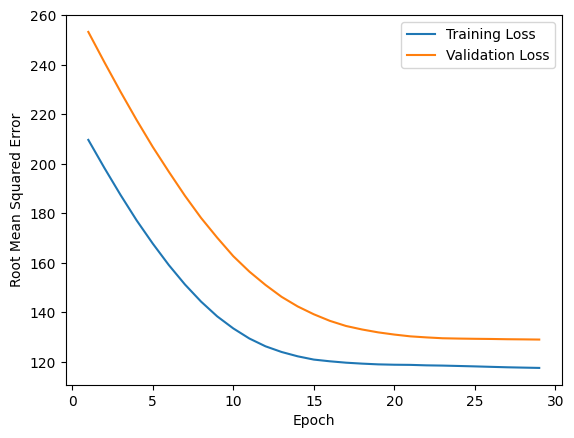

In [ ]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 30 # we can increase the number of training epochs if necessary to get the loss to converge
batch_size = 30 # this is a roughly reasonable batch size
# I tend to use batch sizes generally between 10 and 100.

# Split the original training set into a reduced training set and a
# validation set
validation_split = 0.2

# Build a feature cross to train on - Pandas makes this easy
training_df["rooms_per_person"] = training_df["total_rooms"] / training_df["population"]

my_feature = "rooms_per_person"  # Room density per block
my_label= "median_house_value" # the median value of a house on a specific city block.
# We're now creating a model based on the number of rooms per person per block

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_linreg_network(learning_rate)
weight, bias, epochs, rmse_train, rmse_val = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size, 
                                         validation_split)

print("\nThe learned weight (slope) for your model is %.4f" % weight)
print("The learned bias (y-intercept) for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse_train, rmse_val)

While our test and validation datasets aren't lined up just quite yet, they now exhibit similar behaviors which means we're on the right track in building our network. Feel free to experiment in building out variables to train on above, whether directly from the dataset or using feature crosses like the room density we tried above! If you take anything away from this lesson today, it should be the following:

**Building an ML model is relatively easy - understanding data inputs, outputs, loss functions, and features is not! 90% of machine learning is data engineering, not coding the model together**

This concludes the world's quickest tutorial on basic ML, but there's so much more to explore - we haven't even covered topics such as regularization, different loss functions, one-hot encoding, and more. We hope you leave today understanding that ML is not some magical or insanely hard concept to learn, but a tool you can use right now to help you in physics.